In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
#importing the data
os.chdir('D:/study material/Data Science/Project')

In [3]:
df=pd.read_csv('data.csv',engine='python')

In [4]:
df.head()

,member_id,loan_amnt,terms,batch_ID,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,58189336,14350,36 months,,19.19,E,E3,clerk,9 years,OWN,...,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0
1,70011223,4800,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0
2,70255675,10000,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0
3,1893936,15000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0
4,7652106,16000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0


In [5]:
df.isna().sum()

member_id                           0
loan_amnt                           0
terms                               0
batch_ID                       130748
Rate_of_intrst                      0
grade                               0
sub_grade                           0
Emp_designation                 51462
Experience                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
purpose                             0
State                               0
debt_income_ratio                   0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         454312
mths_since_last_record         750326
numb_credit                        29
pub_rec                            29
total revol_bal                     0
total_credits                      29
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries  

In [6]:
df.shape

(887379, 36)

In [7]:

df=df.drop(['mths_since_last_major_derog','mths_since_last_delinq','mths_since_last_record','member_id ','grade','sub_grade','Emp_designation','Experience','home_ownership'],axis=1)

In [8]:
df.columns

Index(['loan_amnt ', 'terms', 'batch_ID ', 'Rate_of_intrst', 'annual_inc',
       'verification_status', 'purpose', 'State', 'debt_income_ratio',
       'delinq_2yrs', 'inq_last_6mths', 'numb_credit', 'pub_rec',
       'total revol_bal', 'total_credits', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_colle_amt', 'tot_curr_bal'],
      dtype='object')

In [9]:
df=df.drop(['batch_ID '],axis=1)

In [10]:
from sklearn.impute import SimpleImputer


In [11]:
df.dtypes

loan_amnt                       int64
terms                          object
Rate_of_intrst                float64
annual_inc                    float64
verification_status            object
purpose                        object
State                          object
debt_income_ratio             float64
delinq_2yrs                   float64
inq_last_6mths                float64
numb_credit                   float64
pub_rec                       float64
total revol_bal               float64
total_credits                 float64
initial_list_status            object
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
collections_12_mths_ex_med    float64
application_type               object
verification_status_joint      object
last_week_pay                  object
acc_now_delinq                float64
tot_colle_amt                 float64
tot_curr_bal                  float64
dtype: objec

In [12]:
import matplotlib.pyplot as plt  

In [13]:
df.shape

(887379, 26)

In [14]:
from collections import Counter

In [15]:
import seaborn as sns

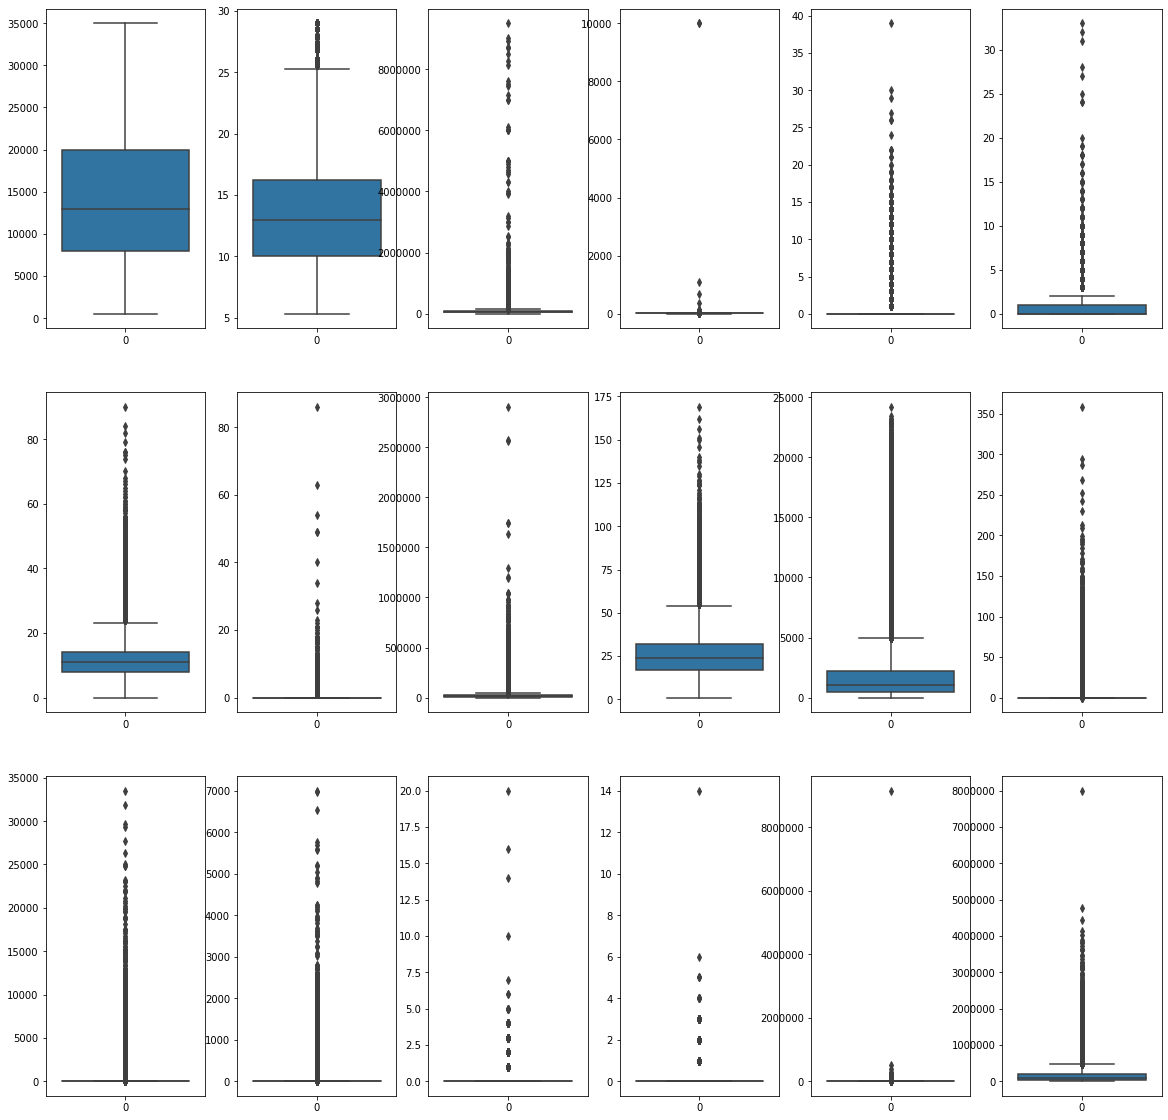

In [16]:
fig,((ax1,ax2,ax3,ax4,ax5,ax6),(ax7,ax8,ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16,ax17,ax18))=plt.subplots(nrows=3,ncols=6)
fig.set_size_inches(20,20)
sns.boxplot(data=df['loan_amnt '],ax=ax1)
sns.boxplot(data=df['Rate_of_intrst'],ax=ax2)
sns.boxplot(data=df['annual_inc'],ax=ax3)#
sns.boxplot(data=df['debt_income_ratio'],ax=ax4)#
sns.boxplot(data=df['delinq_2yrs'],ax=ax5)#
sns.boxplot(data=df['inq_last_6mths'],ax=ax6)#
sns.boxplot(data=df['numb_credit'],ax=ax7)#
sns.boxplot(data=df['pub_rec'],ax=ax8)#
sns.boxplot(data=df['total revol_bal'],ax=ax9)#
sns.boxplot(data=df['total_credits'],ax=ax10)#
sns.boxplot(data=df['total_rec_int'],ax=ax11)#
sns.boxplot(data=df['total_rec_late_fee'],ax=ax12)#
sns.boxplot(data=df['recoveries'],ax=ax13)#
sns.boxplot(data=df['collection_recovery_fee'],ax=ax14)#
sns.boxplot(data=df['collections_12_mths_ex_med'],ax=ax15)#
sns.boxplot(data=df['acc_now_delinq'],ax=ax16)#
sns.boxplot(data=df['tot_colle_amt'],ax=ax17)#
sns.boxplot(data=df['tot_curr_bal'],ax=ax18)

In [17]:
df1=df[df.columns[df.isnull().any()]] 
df2=df[df.columns[~df.isnull().any()]]

In [18]:
df1.columns.shape

(11,)

In [19]:
df2.columns.shape

(15,)

In [20]:
df.shape

(887379, 26)

In [21]:
df1.dtypes

annual_inc                    float64
delinq_2yrs                   float64
inq_last_6mths                float64
numb_credit                   float64
pub_rec                       float64
total_credits                 float64
collections_12_mths_ex_med    float64
verification_status_joint      object
acc_now_delinq                float64
tot_colle_amt                 float64
tot_curr_bal                  float64
dtype: object

In [22]:
df11=df1.drop(['verification_status_joint'],axis=1)

In [23]:
n=df11.columns

In [24]:
df12=df1[['verification_status_joint']]

In [25]:
#Filling missing values to numerical variables
from sklearn.impute import SimpleImputer
mp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
mp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df11=mp_median.fit_transform(df11)

In [26]:
df11

array([[2.87000e+04, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.86990e+04],
       [6.50000e+04, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 9.97400e+03],
       [4.50000e+04, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        6.50000e+01, 3.82950e+04],
       ...,
       [5.60000e+04, 0.00000e+00, 3.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.05590e+04],
       [1.00000e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.91998e+05],
       [1.20000e+04, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.05590e+04]])

In [27]:
#filling missing values for categorical data
df12=df12.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [28]:
df12

,verification_status_joint
0,Not Verified
1,Not Verified
2,Not Verified
3,Not Verified
4,Not Verified
...,...
887374,Not Verified
887375,Not Verified
887376,Not Verified
887377,Not Verified


In [29]:
df12.isna().sum()

verification_status_joint    0
dtype: int64

In [30]:
df13=pd.DataFrame(df11)

In [31]:
df13

,0,1,2,3,4,5,6,7,8,9
0,28700.0,0.0,1.0,14.0,1.0,28.0,0.0,0.0,0.0,28699.0
1,65000.0,0.0,1.0,6.0,0.0,13.0,0.0,0.0,0.0,9974.0
2,45000.0,0.0,0.0,5.0,0.0,19.0,0.0,0.0,65.0,38295.0
3,105000.0,0.0,2.0,10.0,0.0,21.0,0.0,0.0,0.0,55564.0
4,52000.0,0.0,0.0,11.0,0.0,27.0,0.0,0.0,0.0,47159.0
...,...,...,...,...,...,...,...,...,...,...
887374,97250.0,0.0,0.0,12.0,0.0,24.0,0.0,0.0,0.0,143920.0
887375,180000.0,2.0,2.0,21.0,0.0,33.0,0.0,0.0,0.0,772713.0
887376,56000.0,0.0,3.0,11.0,1.0,25.0,0.0,0.0,0.0,80559.0
887377,100000.0,0.0,0.0,7.0,0.0,11.0,0.0,0.0,0.0,291998.0


In [32]:
df13.columns=n

In [33]:
df13

,annual_inc,delinq_2yrs,inq_last_6mths,numb_credit,pub_rec,total_credits,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,28700.0,0.0,1.0,14.0,1.0,28.0,0.0,0.0,0.0,28699.0
1,65000.0,0.0,1.0,6.0,0.0,13.0,0.0,0.0,0.0,9974.0
2,45000.0,0.0,0.0,5.0,0.0,19.0,0.0,0.0,65.0,38295.0
3,105000.0,0.0,2.0,10.0,0.0,21.0,0.0,0.0,0.0,55564.0
4,52000.0,0.0,0.0,11.0,0.0,27.0,0.0,0.0,0.0,47159.0
...,...,...,...,...,...,...,...,...,...,...
887374,97250.0,0.0,0.0,12.0,0.0,24.0,0.0,0.0,0.0,143920.0
887375,180000.0,2.0,2.0,21.0,0.0,33.0,0.0,0.0,0.0,772713.0
887376,56000.0,0.0,3.0,11.0,1.0,25.0,0.0,0.0,0.0,80559.0
887377,100000.0,0.0,0.0,7.0,0.0,11.0,0.0,0.0,0.0,291998.0


In [34]:
df12

,verification_status_joint
0,Not Verified
1,Not Verified
2,Not Verified
3,Not Verified
4,Not Verified
...,...
887374,Not Verified
887375,Not Verified
887376,Not Verified
887377,Not Verified


In [35]:
df2

,loan_amnt,terms,Rate_of_intrst,verification_status,purpose,State,debt_income_ratio,total revol_bal,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,application_type,last_week_pay
0,14350,36 months,19.19,Source Verified,debt_consolidation,FL,33.88,22515.0,f,1173.84,0.0,0.0,0.0,INDIVIDUAL,26th week
1,4800,36 months,10.99,Source Verified,home_improvement,MD,3.64,7624.0,w,83.95,0.0,0.0,0.0,INDIVIDUAL,9th week
2,10000,36 months,7.26,Not Verified,debt_consolidation,OH,18.42,10877.0,w,56.47,0.0,0.0,0.0,INDIVIDUAL,9th week
3,15000,36 months,19.72,Not Verified,debt_consolidation,VA,14.97,13712.0,f,4858.62,0.0,0.0,0.0,INDIVIDUAL,135th week
4,16000,36 months,10.64,Verified,credit_card,CA,20.16,35835.0,w,2296.41,0.0,0.0,0.0,INDIVIDUAL,96th week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,15000,36 months,6.49,Not Verified,credit_card,TX,12.46,12201.0,w,1180.32,0.0,0.0,0.0,INDIVIDUAL,83th week
887375,35000,60 months,25.89,Verified,debt_consolidation,NY,11.78,52584.0,f,6508.41,0.0,0.0,0.0,INDIVIDUAL,39th week
887376,14000,60 months,17.51,Verified,home_improvement,NH,16.44,10948.0,f,3456.24,0.0,0.0,0.0,INDIVIDUAL,87th week
887377,20000,36 months,7.26,Source Verified,credit_card,MD,15.00,33599.0,w,766.84,0.0,0.0,0.0,INDIVIDUAL,35th week


In [36]:
df=pd.concat([df2,df12,df13],axis=1)

In [37]:
df

,loan_amnt,terms,Rate_of_intrst,verification_status,purpose,State,debt_income_ratio,total revol_bal,initial_list_status,total_rec_int,...,annual_inc,delinq_2yrs,inq_last_6mths,numb_credit,pub_rec,total_credits,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,14350,36 months,19.19,Source Verified,debt_consolidation,FL,33.88,22515.0,f,1173.84,...,28700.0,0.0,1.0,14.0,1.0,28.0,0.0,0.0,0.0,28699.0
1,4800,36 months,10.99,Source Verified,home_improvement,MD,3.64,7624.0,w,83.95,...,65000.0,0.0,1.0,6.0,0.0,13.0,0.0,0.0,0.0,9974.0
2,10000,36 months,7.26,Not Verified,debt_consolidation,OH,18.42,10877.0,w,56.47,...,45000.0,0.0,0.0,5.0,0.0,19.0,0.0,0.0,65.0,38295.0
3,15000,36 months,19.72,Not Verified,debt_consolidation,VA,14.97,13712.0,f,4858.62,...,105000.0,0.0,2.0,10.0,0.0,21.0,0.0,0.0,0.0,55564.0
4,16000,36 months,10.64,Verified,credit_card,CA,20.16,35835.0,w,2296.41,...,52000.0,0.0,0.0,11.0,0.0,27.0,0.0,0.0,0.0,47159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,15000,36 months,6.49,Not Verified,credit_card,TX,12.46,12201.0,w,1180.32,...,97250.0,0.0,0.0,12.0,0.0,24.0,0.0,0.0,0.0,143920.0
887375,35000,60 months,25.89,Verified,debt_consolidation,NY,11.78,52584.0,f,6508.41,...,180000.0,2.0,2.0,21.0,0.0,33.0,0.0,0.0,0.0,772713.0
887376,14000,60 months,17.51,Verified,home_improvement,NH,16.44,10948.0,f,3456.24,...,56000.0,0.0,3.0,11.0,1.0,25.0,0.0,0.0,0.0,80559.0
887377,20000,36 months,7.26,Source Verified,credit_card,MD,15.00,33599.0,w,766.84,...,100000.0,0.0,0.0,7.0,0.0,11.0,0.0,0.0,0.0,291998.0


In [38]:
df.isna().sum()

loan_amnt                     0
terms                         0
Rate_of_intrst                0
verification_status           0
purpose                       0
State                         0
debt_income_ratio             0
total revol_bal               0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
application_type              0
last_week_pay                 0
verification_status_joint     0
annual_inc                    0
delinq_2yrs                   0
inq_last_6mths                0
numb_credit                   0
pub_rec                       0
total_credits                 0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_colle_amt                 0
tot_curr_bal                  0
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

In [40]:
df.dtypes

loan_amnt                       int64
terms                          object
Rate_of_intrst                float64
verification_status            object
purpose                        object
State                          object
debt_income_ratio             float64
total revol_bal               float64
initial_list_status            object
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
application_type               object
last_week_pay                  object
verification_status_joint      object
annual_inc                    float64
delinq_2yrs                   float64
inq_last_6mths                float64
numb_credit                   float64
pub_rec                       float64
total_credits                 float64
collections_12_mths_ex_med    float64
acc_now_delinq                float64
tot_colle_amt                 float64
tot_curr_bal                  float64
dtype: objec

In [41]:
df['terms']=lb_make.fit_transform(df['terms'])
df['verification_status']=lb_make.fit_transform(df['verification_status'])
df['purpose']=lb_make.fit_transform(df['purpose'])
df['State']=lb_make.fit_transform(df['State'])
df['initial_list_status']=lb_make.fit_transform(df['initial_list_status'])
df['application_type']=lb_make.fit_transform(df['application_type'])
df['last_week_pay']=lb_make.fit_transform(df['last_week_pay'])
df['verification_status_joint']=lb_make.fit_transform(df['verification_status_joint'])

In [42]:
df

,loan_amnt,terms,Rate_of_intrst,verification_status,purpose,State,debt_income_ratio,total revol_bal,initial_list_status,total_rec_int,...,annual_inc,delinq_2yrs,inq_last_6mths,numb_credit,pub_rec,total_credits,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,14350,0,19.19,1,2,9,33.88,22515.0,0,1173.84,...,28700.0,0.0,1.0,14.0,1.0,28.0,0.0,0.0,0.0,28699.0
1,4800,0,10.99,1,4,20,3.64,7624.0,1,83.95,...,65000.0,0.0,1.0,6.0,0.0,13.0,0.0,0.0,0.0,9974.0
2,10000,0,7.26,0,2,35,18.42,10877.0,1,56.47,...,45000.0,0.0,0.0,5.0,0.0,19.0,0.0,0.0,65.0,38295.0
3,15000,0,19.72,0,2,45,14.97,13712.0,0,4858.62,...,105000.0,0.0,2.0,10.0,0.0,21.0,0.0,0.0,0.0,55564.0
4,16000,0,10.64,2,1,4,20.16,35835.0,1,2296.41,...,52000.0,0.0,0.0,11.0,0.0,27.0,0.0,0.0,0.0,47159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,15000,0,6.49,0,1,43,12.46,12201.0,1,1180.32,...,97250.0,0.0,0.0,12.0,0.0,24.0,0.0,0.0,0.0,143920.0
887375,35000,1,25.89,2,2,34,11.78,52584.0,0,6508.41,...,180000.0,2.0,2.0,21.0,0.0,33.0,0.0,0.0,0.0,772713.0
887376,14000,1,17.51,2,4,30,16.44,10948.0,0,3456.24,...,56000.0,0.0,3.0,11.0,1.0,25.0,0.0,0.0,0.0,80559.0
887377,20000,0,7.26,1,1,20,15.00,33599.0,1,766.84,...,100000.0,0.0,0.0,7.0,0.0,11.0,0.0,0.0,0.0,291998.0


In [43]:
df.dtypes

loan_amnt                       int64
terms                           int32
Rate_of_intrst                float64
verification_status             int32
purpose                         int32
State                           int32
debt_income_ratio             float64
total revol_bal               float64
initial_list_status             int32
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
application_type                int32
last_week_pay                   int32
verification_status_joint       int32
annual_inc                    float64
delinq_2yrs                   float64
inq_last_6mths                float64
numb_credit                   float64
pub_rec                       float64
total_credits                 float64
collections_12_mths_ex_med    float64
acc_now_delinq                float64
tot_colle_amt                 float64
tot_curr_bal                  float64
dtype: objec

In [44]:
from scipy import stats

In [45]:
df

,loan_amnt,terms,Rate_of_intrst,verification_status,purpose,State,debt_income_ratio,total revol_bal,initial_list_status,total_rec_int,...,annual_inc,delinq_2yrs,inq_last_6mths,numb_credit,pub_rec,total_credits,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,14350,0,19.19,1,2,9,33.88,22515.0,0,1173.84,...,28700.0,0.0,1.0,14.0,1.0,28.0,0.0,0.0,0.0,28699.0
1,4800,0,10.99,1,4,20,3.64,7624.0,1,83.95,...,65000.0,0.0,1.0,6.0,0.0,13.0,0.0,0.0,0.0,9974.0
2,10000,0,7.26,0,2,35,18.42,10877.0,1,56.47,...,45000.0,0.0,0.0,5.0,0.0,19.0,0.0,0.0,65.0,38295.0
3,15000,0,19.72,0,2,45,14.97,13712.0,0,4858.62,...,105000.0,0.0,2.0,10.0,0.0,21.0,0.0,0.0,0.0,55564.0
4,16000,0,10.64,2,1,4,20.16,35835.0,1,2296.41,...,52000.0,0.0,0.0,11.0,0.0,27.0,0.0,0.0,0.0,47159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,15000,0,6.49,0,1,43,12.46,12201.0,1,1180.32,...,97250.0,0.0,0.0,12.0,0.0,24.0,0.0,0.0,0.0,143920.0
887375,35000,1,25.89,2,2,34,11.78,52584.0,0,6508.41,...,180000.0,2.0,2.0,21.0,0.0,33.0,0.0,0.0,0.0,772713.0
887376,14000,1,17.51,2,4,30,16.44,10948.0,0,3456.24,...,56000.0,0.0,3.0,11.0,1.0,25.0,0.0,0.0,0.0,80559.0
887377,20000,0,7.26,1,1,20,15.00,33599.0,1,766.84,...,100000.0,0.0,0.0,7.0,0.0,11.0,0.0,0.0,0.0,291998.0


In [46]:
y=df[['total revol_bal']]

In [47]:
x=df.iloc[:,[1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]

In [48]:
y

,total revol_bal
0,22515.0
1,7624.0
2,10877.0
3,13712.0
4,35835.0
...,...
887374,12201.0
887375,52584.0
887376,10948.0
887377,33599.0


In [49]:
x

,terms,Rate_of_intrst,verification_status,purpose,State,debt_income_ratio,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,...,annual_inc,delinq_2yrs,inq_last_6mths,numb_credit,pub_rec,total_credits,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,0,19.19,1,2,9,33.88,0,1173.84,0.0,0.0,...,28700.0,0.0,1.0,14.0,1.0,28.0,0.0,0.0,0.0,28699.0
1,0,10.99,1,4,20,3.64,1,83.95,0.0,0.0,...,65000.0,0.0,1.0,6.0,0.0,13.0,0.0,0.0,0.0,9974.0
2,0,7.26,0,2,35,18.42,1,56.47,0.0,0.0,...,45000.0,0.0,0.0,5.0,0.0,19.0,0.0,0.0,65.0,38295.0
3,0,19.72,0,2,45,14.97,0,4858.62,0.0,0.0,...,105000.0,0.0,2.0,10.0,0.0,21.0,0.0,0.0,0.0,55564.0
4,0,10.64,2,1,4,20.16,1,2296.41,0.0,0.0,...,52000.0,0.0,0.0,11.0,0.0,27.0,0.0,0.0,0.0,47159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,0,6.49,0,1,43,12.46,1,1180.32,0.0,0.0,...,97250.0,0.0,0.0,12.0,0.0,24.0,0.0,0.0,0.0,143920.0
887375,1,25.89,2,2,34,11.78,0,6508.41,0.0,0.0,...,180000.0,2.0,2.0,21.0,0.0,33.0,0.0,0.0,0.0,772713.0
887376,1,17.51,2,4,30,16.44,0,3456.24,0.0,0.0,...,56000.0,0.0,3.0,11.0,1.0,25.0,0.0,0.0,0.0,80559.0
887377,0,7.26,1,1,20,15.00,1,766.84,0.0,0.0,...,100000.0,0.0,0.0,7.0,0.0,11.0,0.0,0.0,0.0,291998.0


In [50]:
a=x.columns

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [52]:
x

array([[-0.65472446,  1.35633124, -0.03458908, ..., -0.06429842,
        -0.02100372, -0.71496666],
       [-0.65472446, -0.51501808, -0.03458908, ..., -0.06429842,
        -0.02100372, -0.8411535 ],
       [-0.65472446, -1.36625381, -1.29661067, ..., -0.06429842,
        -0.01443463, -0.6502997 ],
       ...,
       [ 1.52736008,  0.97293284,  1.2274325 , ..., -0.06429842,
        -0.02100372, -0.36548471],
       [-0.65472446, -1.36625381, -0.03458908, ..., -0.06429842,
        -0.02100372,  1.05939215],
       [ 1.52736008, -1.31376474, -1.29661067, ..., -0.06429842,
        -0.02100372, -0.36548471]])

In [53]:
x=pd.DataFrame(x)

In [54]:
x.columns=a

In [55]:
x

,terms,Rate_of_intrst,verification_status,purpose,State,debt_income_ratio,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,...,annual_inc,delinq_2yrs,inq_last_6mths,numb_credit,pub_rec,total_credits,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,-0.654724,1.356331,-0.034589,-0.250552,-0.933221,0.914625,-0.97077,-0.277263,-0.097042,-0.112082,...,-0.716057,-0.364672,0.305877,0.461058,1.382450,0.230737,-0.107149,-0.064298,-0.021004,-0.714967
1,-0.654724,-0.515018,-0.034589,0.626483,-0.207249,-0.844475,1.03011,-0.797409,-0.097042,-0.112082,...,-0.154990,-0.364672,0.305877,-1.043486,-0.335522,-1.036116,-0.107149,-0.064298,-0.021004,-0.841154
2,-0.654724,-1.366254,-1.296611,-0.250552,0.782712,0.015297,1.03011,-0.810523,-0.097042,-0.112082,...,-0.464118,-0.364672,-0.695687,-1.231554,-0.335522,-0.529374,-0.107149,-0.064298,-0.014435,-0.650300
3,-0.654724,1.477284,-1.296611,-0.250552,1.442686,-0.185394,-0.97077,1.481284,-0.097042,-0.112082,...,0.463266,-0.364672,1.307441,-0.291214,-0.335522,-0.360461,-0.107149,-0.064298,-0.021004,-0.533925
4,-0.654724,-0.594893,1.227433,-0.689069,-1.263208,0.116515,1.03011,0.258479,-0.097042,-0.112082,...,-0.355923,-0.364672,-0.695687,-0.103146,-0.335522,0.146281,-0.107149,-0.064298,-0.021004,-0.590566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,-0.654724,-1.541978,-1.296611,-0.689069,1.310691,-0.331404,1.03011,-0.274170,-0.097042,-0.112082,...,0.343479,-0.364672,-0.695687,0.084922,-0.335522,-0.107090,-0.107149,-0.064298,-0.021004,0.061502
887375,1.527360,2.885361,1.227433,-0.250552,0.716715,-0.370960,-0.97077,2.268640,-0.097042,-0.112082,...,1.622496,1.954892,1.307441,1.777534,-0.335522,0.653022,-0.107149,-0.064298,-0.021004,4.298907
887376,1.527360,0.972933,1.227433,0.626483,0.452725,-0.099882,-0.97077,0.812004,-0.097042,-0.112082,...,-0.294097,-0.364672,2.309004,-0.103146,1.382450,-0.022633,-0.107149,-0.064298,-0.021004,-0.365485
887377,-0.654724,-1.366254,-0.034589,-0.689069,-0.207249,-0.183649,1.03011,-0.471502,-0.097042,-0.112082,...,0.385984,-0.364672,-0.695687,-0.855418,-0.335522,-1.205029,-0.107149,-0.064298,-0.021004,1.059392


In [56]:
# Feature Extraction
y

,total revol_bal
0,22515.0
1,7624.0
2,10877.0
3,13712.0
4,35835.0
...,...
887374,12201.0
887375,52584.0
887376,10948.0
887377,33599.0


In [57]:
from sklearn.model_selection import RepeatedKFold 

In [58]:

kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(x):
    print("Train:", train_index, "Validation:",test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Train: [     0      4      6 ... 887374 887376 887377] Validation: [     1      2      3 ... 887367 887375 887378]
Train: [     0      1      2 ... 887376 887377 887378] Validation: [     4     13     14 ... 887368 887370 887371]
Train: [     0      1      2 ... 887375 887377 887378] Validation: [     7     10     20 ... 887355 887361 887376]
Train: [     1      2      3 ... 887376 887377 887378] Validation: [     0      6      8 ... 887369 887373 887374]
Train: [     0      1      2 ... 887375 887376 887378] Validation: [    17     25     29 ... 887362 887372 887377]
Train: [     0      1      2 ... 887375 887377 887378] Validation: [     4     26     30 ... 887370 887372 887376]
Train: [     3      4      5 ... 887376 887377 887378] Validation: [     0      1      2 ... 887350 887361 887362]
Train: [     0      1      2 ... 887376 887377 887378] Validation: [     6      7      8 ... 887373 887374 887375]
Train: [     0      1      2 ... 887374 887375 887376] Validation: [    10     1

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
ln=LinearRegression()

In [61]:
lnfit=ln.fit(x_train,y_train)

In [62]:
ypred=lnfit.predict(x_test)

In [68]:
lnfit.score(x_train,y_train)  #0.2421497882511232

0.2421497882511232

In [69]:
lnfit.score(x_test,y_test) #0.24260182401878627

0.24260182401878627

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)   #0.24260182401878627

0.24260182401878627

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [66]:
rms = sqrt(mean_squared_error(y_test, ypred))

In [67]:
rms   #19693.431449753723

19693.431449753723

In [70]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)
clf_pred=clf.predict(x_test)
r2_score(y_test,clf_pred)   #-0.25400879405351673

-0.25400879405351673

In [71]:
clf.score(x_train,y_train)  #-0.25400879405351673

1.0

In [72]:
clf.score(x_test,y_test)  #-0.25400879405351673

-0.25400879405351673

In [73]:
rms = sqrt(mean_squared_error(y_test, clf_pred))

In [74]:
rms  #25340.17205130512

25340.17205130512

In [75]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=100) 
rr.fit(x_train, y_train)
rr_pred=rr.predict(x_test)
Ridge_train_score = rr.score(x_train,y_train)
Ridge_test_score = rr.score(x_test, y_test)

In [76]:
rr.score(x_train,y_train)  #0.24214978434765289

0.24214978434765289

In [77]:
rr.score(x_test,y_test) #0.24260035998329676

0.24260035998329676

In [78]:
r2_score(y_test,rr_pred)   #0.24260035998329676

0.24260035998329676

In [79]:
rms = sqrt(mean_squared_error(y_test,rr_pred))

In [80]:
rms   #19693.450483248613

19693.450483248613

In [81]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
Random_r=model.predict(x_test)
r2_score(y_test,Random_r)   

C:\Users\pavan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.39358768978850067

In [82]:
model.score(x_train,y_train) #0.9081972462401092

0.9081972462401092

In [83]:
model.score(x_test,y_test) #0.3935876897885006

0.3935876897885006

In [84]:
rms = sqrt(mean_squared_error(y_test,Random_r)) 

In [85]:
rms  #17621.51616738632

17621.51616738632

In [86]:
from sklearn.linear_model import LassoCV
model = LassoCV()
model.fit(x_train, y_train)
model.score(x_train,y_train)
model.score(x_test,y_test)
L_r=model.predict(x_test)
r2_score(y_test,L_r) 

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2417887286617949

In [87]:
model.score(x_train,y_train)  #0.24181567562182493

0.24181567562182493

In [88]:
model.score(x_test,y_test)  #0.2417887286617949

0.2417887286617949

In [89]:
rms = sqrt(mean_squared_error(y_test,L_r))

In [90]:
rms  #19703.99943297979

19703.99943297979

In [91]:
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV()
model.fit(x_train, y_train)
model.score(x_train,y_train)
model.score(x_test,y_test)
er = model.predict(x_test)
r2_score(y_test,er)  #0.06519183406895845

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.06519183406895845

In [92]:
model.score(x_train,y_train) #0.06659649420435976

0.06659649420435976

In [93]:
model.score(x_test,y_test)  #0.06519183406895845

0.06519183406895845

In [94]:
rms=sqrt(mean_squared_error(y_test,er))

In [95]:
rms #21878.64980714331

21878.64980714331